In [58]:
import numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets, neighbors
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler

import pandas as pd

from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RandomUnderSampler
import numpy
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [59]:
data = pd.read_csv("/content/drive/MyDrive/hackaton/datasetpredictvente.csv", delimiter=";")

In [60]:
data

,Date,Time,event_type,user_id,user_session,product_id,price,is_view,is_cart,p_views,...,subsubcategory_mouse,subsubcategory_player,subsubcategory_power_supply,subsubcategory_printer,subsubcategory_saw,subsubcategory_soldering,subsubcategory_videocards,subsubcategory_videoregister,subsubcategory_wifi,is_purchase
0,2020-09-24,12:02:19,view,1515915625519390366,F71OG8wWVP,3828758,21.59,1,0,372,...,False,False,False,False,False,False,False,False,False,0
1,2020-09-24,12:22:49,view,1515915625519398031,hq3JGndGca,1271549,405.65,1,0,365,...,False,False,False,False,False,False,False,False,False,0
2,2020-09-24,12:48:31,view,1515915625519407618,JB3Sy5LCfb,124712,204.79,1,0,513,...,False,False,False,False,False,False,False,False,False,0
3,2020-09-24,12:49:34,view,1515915625519407618,bRZAHDpYFC,124712,204.79,1,0,513,...,False,False,False,False,False,False,False,False,False,0
4,2020-09-24,12:50:22,cart,1515915625519407618,bRZAHDpYFC,124712,204.79,0,1,513,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305904,2021-02-28,22:12:03,view,1515915625611012647,i4cphLZzmV,3506321,11.86,1,0,151,...,False,False,False,False,False,False,False,False,True,0
305905,2021-02-28,22:51:09,view,1515915625611017316,iiyIldOJxy,3721154,327.43,1,0,427,...,False,False,False,False,False,False,False,False,True,0
305906,2021-02-28,23:06:42,view,1515915625611014848,34XnVqZSSp,3698949,31.17,1,0,12,...,False,False,False,False,False,False,False,False,True,0
305907,2021-02-28,23:08:23,view,1515915625611014848,34XnVqZSSp,673347,36.37,1,0,23,...,False,False,False,False,False,False,False,False,True,0


In [53]:
# Group by user_id and product_id, and sum the 'is_view' column
# grouped_data = data.groupby(['user_id', 'product_id'])['is_view'].sum().reset_index()

# # Filter out rows where sum of 'is_view' is 0
# grouped_data = grouped_data[grouped_data['is_view'] > 0]

# grouped_data[["user_id", "product_id"]]

In [54]:
# new_df = None

# for user_record in grouped_data.values:
#   user_df = data[data['user_id'] == user_record[0] ]
#   user_df = data[data['user_id'] == user_record[1]]
#   if new_df is None:
#     new_df = user_df
#   else:
#     new_df = pd.concat([new_df,user_df])

# new_df

In [57]:
# grouped_data[grouped_data['is_view']==0]

In [56]:
# # Create a multi-index from the grouped data for filtering
# grouped_index = grouped_data.set_index(['user_id', 'product_id']).index

# # Filter the original dataframe to get only rows corresponding to grouped_data where sum of 'is_view' > 0
# filtered_data = data.set_index(['user_id', 'product_id'])
# filtered_data = filtered_data[filtered_data.index.isin(grouped_index)].reset_index()
# filtered_data

In [61]:
data = data.sample(frac=1, random_state=12)

In [62]:
data

,Date,Time,event_type,user_id,user_session,product_id,price,is_view,is_cart,p_views,...,subsubcategory_mouse,subsubcategory_player,subsubcategory_power_supply,subsubcategory_printer,subsubcategory_saw,subsubcategory_soldering,subsubcategory_videocards,subsubcategory_videoregister,subsubcategory_wifi,is_purchase
153987,2021-02-18,12:53:51,cart,1515915625536567608,PP5velgE1e,736586,61.17,0,1,26,...,False,False,True,False,False,False,False,False,False,0
30559,2020-10-07,20:59:51,view,1515915625523341589,OcHbUOSyUg,139144,25.29,1,0,301,...,False,False,False,False,False,False,False,False,False,0
185093,2021-02-11,03:36:28,view,1515915625603971736,zGS2BEDjgl,3822093,213.83,1,0,188,...,False,False,False,True,False,False,False,False,False,0
158388,2020-10-13,14:27:21,cart,1515915625523301464,3C7JTLk04h,1423328,199.37,0,1,470,...,False,False,False,True,False,False,False,False,False,0
238115,2021-01-14,08:41:31,cart,1515915625592974338,2wtXHd9Uhj,1813930,370.46,0,1,559,...,False,False,False,False,False,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206083,2020-11-20,18:11:33,view,1515915625541781049,5uzhKJdKNT,4078924,599.60,1,0,653,...,False,False,False,False,False,False,True,False,False,0
36482,2021-02-03,18:18:49,view,1515915625600277300,auqfAxPsGe,140066,30.63,1,0,37,...,False,False,False,False,False,False,False,False,False,0
40177,2020-10-08,17:47:41,cart,1515915625517878087,iT1bX8DLoN,3791351,204.29,0,1,5721,...,False,False,False,False,False,False,False,False,False,0
255366,2021-01-26,04:01:49,view,1515915625597181576,utE1kaHPt0,3964971,613.73,1,0,159,...,False,False,False,False,False,False,True,False,False,0


In [63]:
df = data.drop(columns=['Date', 'Time', 'event_type', 'user_session', 'product_id', 'user_id'])
df



,price,is_view,is_cart,p_views,p_carts,p_purchases,user_views,user_carts,user_purchases,p_rating,...,subsubcategory_mouse,subsubcategory_player,subsubcategory_power_supply,subsubcategory_printer,subsubcategory_saw,subsubcategory_soldering,subsubcategory_videocards,subsubcategory_videoregister,subsubcategory_wifi,is_purchase
153987,61.17,0,1,26,6,6,140,41,13,5.0,...,False,False,True,False,False,False,False,False,False,0
30559,25.29,1,0,301,18,8,1,0,0,6.0,...,False,False,False,False,False,False,False,False,False,0
185093,213.83,1,0,188,4,1,1,0,0,1.0,...,False,False,False,True,False,False,False,False,False,0
158388,199.37,0,1,470,64,65,2,1,0,52.0,...,False,False,False,True,False,False,False,False,False,0
238115,370.46,0,1,559,97,56,17,3,1,45.0,...,False,False,False,False,False,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206083,599.60,1,0,653,90,47,21,3,0,38.0,...,False,False,False,False,False,False,True,False,False,0
36482,30.63,1,0,37,0,0,1,0,0,0.0,...,False,False,False,False,False,False,False,False,False,0
40177,204.29,0,1,5721,761,423,7,1,0,100.0,...,False,False,False,False,False,False,False,False,False,0
255366,613.73,1,0,159,21,17,8,2,0,14.0,...,False,False,False,False,False,False,True,False,False,0


In [64]:
#scaler = StandardScaler()
#columns = ['price','p_views']
#df_mod = scaler.fit_transform(df[columns])

#df[columns] = df_mod
#df

In [65]:
rus = RandomUnderSampler(random_state=13)
y_solution= 'is_purchase'
problem = df.drop(columns=[y_solution])
solution = df[y_solution]
problem,solution = rus.fit_resample(problem,solution)
problem = problem
solution = solution

In [ ]:
problem.head()

,price,is_view,is_cart,p_views,p_carts,p_purchases,user_views,user_carts,user_purchases,p_rating,...,subsubcategory_motherboard,subsubcategory_mouse,subsubcategory_player,subsubcategory_power_supply,subsubcategory_printer,subsubcategory_saw,subsubcategory_soldering,subsubcategory_videocards,subsubcategory_videoregister,subsubcategory_wifi
0,34.30,1,0,71,6,4,5,0,0,3.0,...,False,False,False,False,False,False,False,False,False,False
1,77.73,1,0,2440,256,194,93,6,7,100.0,...,True,False,False,False,False,False,False,False,False,False
2,51.43,1,0,289,23,8,1,0,0,6.0,...,True,False,False,False,False,False,False,False,False,False
3,63.35,1,0,250,16,8,1,0,0,6.0,...,False,False,False,False,False,False,False,False,False,False
4,373.46,1,0,1460,126,61,2,0,0,49.0,...,False,False,False,False,False,False,False,True,False,False


In [66]:
solution.value_counts()

is_purchase
0    15469
1    15469
Name: count, dtype: int64

In [ ]:
def get_optimal_k_value(problem, solution):

    n_folds = 10
    parameters = {"n_neighbors" : numpy.arange(1, 40, 2)}

    grid_search_object = GridSearchCV(neighbors.KNeighborsClassifier(),
                                      parameters,
                                      cv=n_folds,
                                      scoring="accuracy",
    )
    grid_search_object.fit(problem, solution)
    print(grid_search_object.best_params_)
    scores = pd.DataFrame(grid_search_object.cv_results_)
    return scores

In [ ]:
scores = get_optimal_k_value(problem, solution)

{'n_neighbors': 3}


[]

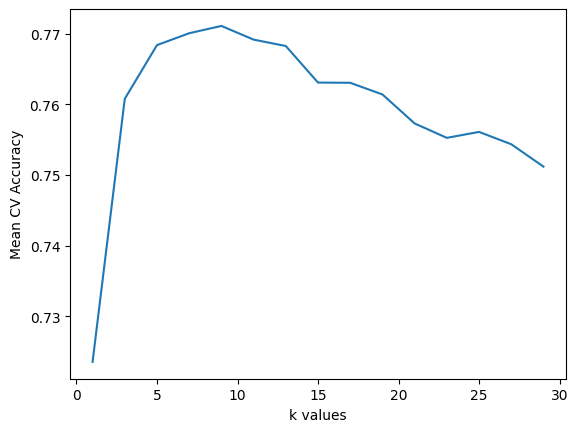

In [ ]:
plt.figure()
plt.plot(scores["param_n_neighbors"], scores["mean_test_score"], label="Mean CV accuracy")
plt.xlabel("k values")
plt.ylabel("Mean CV Accuracy")
plt.plot()

In [67]:
x_train, x_test, y_train, y_test = train_test_split(problem, solution, test_size=0.3, random_state=14)

In [68]:
x_train.head()

,price,is_view,is_cart,p_views,p_carts,p_purchases,user_views,user_carts,user_purchases,p_rating,...,subsubcategory_motherboard,subsubcategory_mouse,subsubcategory_player,subsubcategory_power_supply,subsubcategory_printer,subsubcategory_saw,subsubcategory_soldering,subsubcategory_videocards,subsubcategory_videoregister,subsubcategory_wifi
21533,72.19,0,0,287,17,21,3,1,1,17.0,...,False,False,False,False,False,False,False,False,False,False
11575,77.98,1,0,63,0,0,4,0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
5365,265.05,1,0,330,40,19,117,1,2,15.0,...,False,False,False,False,False,False,False,True,False,False
5169,357.35,1,0,398,42,18,56,1,0,14.0,...,False,False,False,False,False,False,False,False,False,False
19052,163.52,0,0,1061,136,94,3,1,1,75.0,...,False,False,False,False,True,False,False,False,False,False


In [69]:
y_train.head()

21533    1
11575    0
5365     0
5169     0
19052    1
Name: is_purchase, dtype: int64

In [70]:
knn_model = neighbors.KNeighborsClassifier(8)
knn_model.fit(x_train, y_train)



KNeighborsClassifier(n_neighbors=8)

In [71]:
y_pred = knn_model.predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 1, 0])

In [72]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7844214608920491

In [73]:
precision = precision_score(y_test, y_pred)
precision

0.7871745211964708

In [74]:
recall = recall_score(y_test, y_pred)
recall

0.7832976445396146

In [75]:
f1 = f1_score(y_test, y_pred)
f1

0.7852312976279918

In [76]:
import pickle

# Saving is your trained KNN model
with open('/content/drive/MyDrive/hackaton/knn/pretrained.pkl', 'wb') as file:
    pickle.dump(knn_model, file)